* https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats.stats import pearsonr
df = pd.read_csv("../../dados/housing.data", sep="\s+", header = None)
#df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target']
df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
media = df['target'].mean()
media

22.532806324110677

In [3]:
squared_erros =  pd.Series(media - df["target"]) ** 2
SSE = np.sum(squared_erros)
print ('Soma dos Quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE): 42716


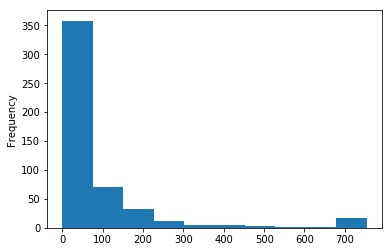

In [4]:
hist_plot = squared_erros.plot('hist')

In [5]:
def calc_desvio_padrao(variable, bias=0):
    observations = float(len(variable))
    return np.sqrt(np.sum((variable - np.mean(variable)) ** 2) / (observations - min(bias, 1)))

In [6]:
print ('Desvio %0.5f Resultado NumPy %0.5f' % (calc_desvio_padrao(df["RM"]), np.std(df["RM"])))

Desvio 0.70192 Resultado NumPy 0.70192


In [10]:
print ('Correlação %0.5f' % pearsonr(df['RM'], df['target'])[0])
#pearsonr(df['RM'], df['target'])

Correlação 0.69536


In [11]:
x_range = [df['RM'].min(), df['RM'].max()]
y_range = [df['target'].min(), df['target'].max()]

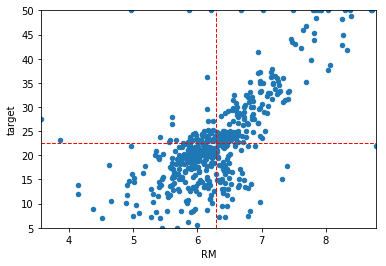

In [16]:
scatter_plot = df.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)
meanY = scatter_plot.plot(x_range, [df['target'].mean(), df['target'].mean()], '--', color='red', linewidth = 1)
meanX = scatter_plot.plot([df['RM'].mean(), df['RM'].mean()], y_range, '--', color='red', linewidth = 1)